In [1]:
import scutquant
import pandas as pd

df = pd.read_feather('D:/Desktop/future-high-freq/TA2301.XZCE.ftr')
df = df[df['datetime'] <= '2022-04-26 23:00:00']
df.set_index(['datetime', 'code'], inplace=True)

In [2]:
df = scutquant.clean(df)
df['label'] = df['close'].shift(-15) / df['open'] - 1
df['liquid'] = df['open_interest'] / df['volume']
for i in range(1, 61):
    df['open_' + str(i)] = df['open'].shift(i)
    df['high_' + str(i)] = df['high'].shift(i)
    df['low_' + str(i)] = df['low'].shift(i)
    df['money_' + str(i)] = df['money'].shift(i)
    df['liquid' + str(i)] = df['liquid'].shift(i)
    
df['vwap3'] = (((df['open'] + df['close']) / 2) * df['volume'] + ((df['open_1'] + df['close'].shift(1)) / 2) * df['volume'].shift(1) 
                + ((df['open_2'] + df['close'].shift(2)) / 2) * df['volume'].shift(2)) / (df['volume'] + df['volume'].shift(1) + 
                                                                                          df['volume'].shift(2))
for i in range(1, 61):
    df['vwap3_' + str(i)] = df['vwap3'].shift(i)
    
df = df.drop(['open', 'close', 'high', 'low', 'volume', 'money', 'open_interest', 'vwap3', 'liquid'], axis=1)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21840 entries, (Timestamp('2022-01-18 09:01:00'), 'TA2301.XZCE') to (Timestamp('2022-04-26 23:00:00'), 'TA2301.XZCE')
Columns: 361 entries, label to vwap3_60
dtypes: float64(361)
memory usage: 61.0+ MB
None
X_mis= 2.53740373200207
clean dataset done 

pop label done 

label norm done 



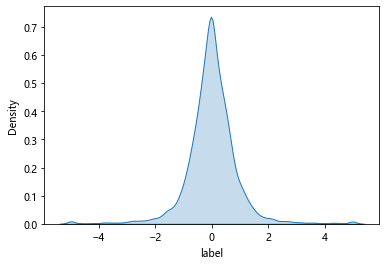

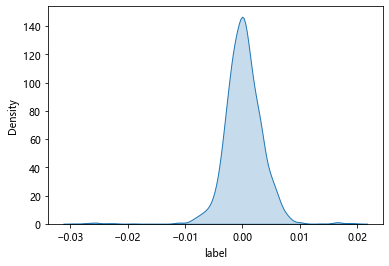

norm data done 

            open_1    high_1     low_1   money_1   liquid1    open_2  \
open_1    1.000000  0.999872  0.999880  0.388468 -0.372467  0.999474   
high_1    0.999872  1.000000  0.999750  0.393629 -0.375941  0.999297   
low_1     0.999880  0.999750  1.000000  0.382932 -0.368764  0.999310   
money_1   0.388468  0.393629  0.382932  1.000000 -0.738153  0.388430   
liquid1  -0.372467 -0.375941 -0.368764 -0.738153  1.000000 -0.372106   
...            ...       ...       ...       ...       ...       ...   
vwap3_56  0.970338  0.970245  0.969969  0.393756 -0.371725  0.970867   
vwap3_57  0.969808  0.969717  0.969435  0.394046 -0.371888  0.970341   
vwap3_58  0.969276  0.969186  0.968896  0.394304 -0.372179  0.969811   
vwap3_59  0.968737  0.968646  0.968357  0.394444 -0.372413  0.969280   
vwap3_60  0.968193  0.968097  0.967808  0.394293 -0.372539  0.968741   

            high_2     low_2   money_2   liquid2  ...  vwap3_51  vwap3_52  \
open_1    0.999549  0.999529  0.387949 -0

In [3]:
x_train, x_test, y_train, y_test, ymean, ystd = scutquant.AutoProcessor(df, y='label', norm='r')

In [4]:
model = scutquant.hybrid()
model.fit(x_train, y_train, x_test, (y_test-ymean)/ystd)

[0]	validation_0-rmse:0.82279
[1]	validation_0-rmse:0.81293
[2]	validation_0-rmse:0.80327
[3]	validation_0-rmse:0.79329
[4]	validation_0-rmse:0.78592
[5]	validation_0-rmse:0.77872
[6]	validation_0-rmse:0.77153
[7]	validation_0-rmse:0.76418
[8]	validation_0-rmse:0.75708
[9]	validation_0-rmse:0.75137
[10]	validation_0-rmse:0.74559
[11]	validation_0-rmse:0.74105
[12]	validation_0-rmse:0.73635
[13]	validation_0-rmse:0.73166
[14]	validation_0-rmse:0.72709
[15]	validation_0-rmse:0.72323
[16]	validation_0-rmse:0.72011
[17]	validation_0-rmse:0.71768
[18]	validation_0-rmse:0.71489
[19]	validation_0-rmse:0.71227
[20]	validation_0-rmse:0.71009
[21]	validation_0-rmse:0.70761
[22]	validation_0-rmse:0.70502
[23]	validation_0-rmse:0.70286
[24]	validation_0-rmse:0.70134
[25]	validation_0-rmse:0.70017
[26]	validation_0-rmse:0.69871
[27]	validation_0-rmse:0.69752
[28]	validation_0-rmse:0.69655
[29]	validation_0-rmse:0.69537
[30]	validation_0-rmse:0.69424
[31]	validation_0-rmse:0.69337
[32]	validation_0-

In [5]:
pred = model.predict(x_test)
pred = pd.Series(pred, index=y_test.index)
pred += ymean
pred *= ystd
print('pearson_corr=', scutquant.pearson_corr(pred, y_test))

pearson_corr= -0.013466648570033789


In [6]:
model.dump('D:/Desktop')